In [1]:
import os
import torch
from prepare_datasets import prepare_datasets
from data_preprocessing import set_seed
from perform_grid_search import perform_grid_search
from train_test import train, validate
from model import GAT
from data_preprocessing import GraphDataset, collate_fn
from dgl.dataloading import GraphDataLoader
from sklearn.metrics import accuracy_score, f1_score
from performance_visualizations import plot_hyperparameter_boxplots
import pandas as pd

c:\Users\barbo\brain classifier repo\brain_classifier\.venv\lib\site-packages\torchdata\datapipes\__init__.py:18: UserWarning: 
################################################################################
WARNING!
The 'datapipes', 'dataloader2' modules are deprecated and will be removed in a
future torchdata release! Please see https://github.com/pytorch/data/issues/1196
to learn more and leave feedback.
################################################################################

  deprecation_warning()
c:\Users\barbo\brain classifier repo\brain_classifier\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Set random seed for reproducibility
set_seed(42)
base_dir = os.path.dirname(os.getcwd())

In [3]:
# Prepare datasets
datasets, feature_names_sc, feature_names_combined = prepare_datasets(base_dir, test_size = 0.15, random_state = 42)

In [4]:
dataset_name = 'sc'
train_graphs = datasets[f'train_graphs_{dataset_name}']
train_labels = datasets[f'train_labels_{dataset_name}']
test_graphs = datasets[f'test_graphs_{dataset_name}']
test_labels = datasets[f'test_labels_{dataset_name}']

In [5]:
# First hyperparameter grid
param_grid = {
    'num_heads': [1, 2, 3, 4],
    'out_channels': [8, 16],
    'num_epochs': [5],
    'learning_rate': [1e-1, 1e-2, 1e-3, 1e-4],
    'weight_decay': [0, 1e-5, 1e-4]
}

In [6]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Perform grid search with K-fold cross-validation on the training set
best_params_1, best_val_f1_1, best_val_accuracy_1, results_df_1 = perform_grid_search(
    train_graphs=train_graphs,
    train_labels=train_labels,
    num_splits=5,
    param_grid=param_grid,
    batch_size=32,
    model_class=GAT,
    device=device
)

In [7]:
print("Best Hyperparameters (based on average validation F1):")
print(best_params_1)
print(f"Best Average Validation F1 Score: {best_val_f1_1}")
print(f"Best Average Validation Accuracy: {best_val_accuracy_1}")

Best Hyperparameters (based on average validation F1):
{'num_heads': 2.0, 'out_channels': 8.0, 'learning_rate': 0.1, 'weight_decay': 0.0001}
Best Average Validation F1 Score: 0.7660526928268864
Best Average Validation Accuracy: 0.7690322580645161


In [ ]:
# Save results_df to a CSV file for later analysis
#results_df_1.to_csv('first_grid_search_sc.csv', index=False)

In [1]:
import pandas as pd
results_df_1 = pd.read_csv('first_grid_search_sc.csv')

In [10]:
from performance_visualizations import get_top_results

top_results_df_1 = get_top_results(
    results_df=results_df_1,
    hyperparameters=['learning_rate', 'num_heads', 'weight_decay', 'out_channels'],
    metric='val_f1',
    percentile=2,
    print_flag=True
)

c:\Users\barbo\brain classifier repo\brain_classifier\src1\performance_visualizations.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_results_df[hyperparameters] = top_results_df[hyperparameters].round(3)


,fold,val_f1,learning_rate,num_heads,weight_decay,out_channels
110,1,0.871781,0.1,4,0.0,16
55,1,0.871781,0.1,2,0.0,16
70,1,0.839721,0.1,3,0.0,8
65,1,0.839392,0.1,3,0.0,8
20,1,0.839392,0.1,1,0.0,16
40,1,0.839392,0.1,2,0.0,8
0,1,0.837663,0.1,1,0.0,8
80,1,0.837663,0.1,3,0.0,16
30,1,0.837663,0.1,2,0.0,8
35,1,0.837663,0.1,2,0.0,8


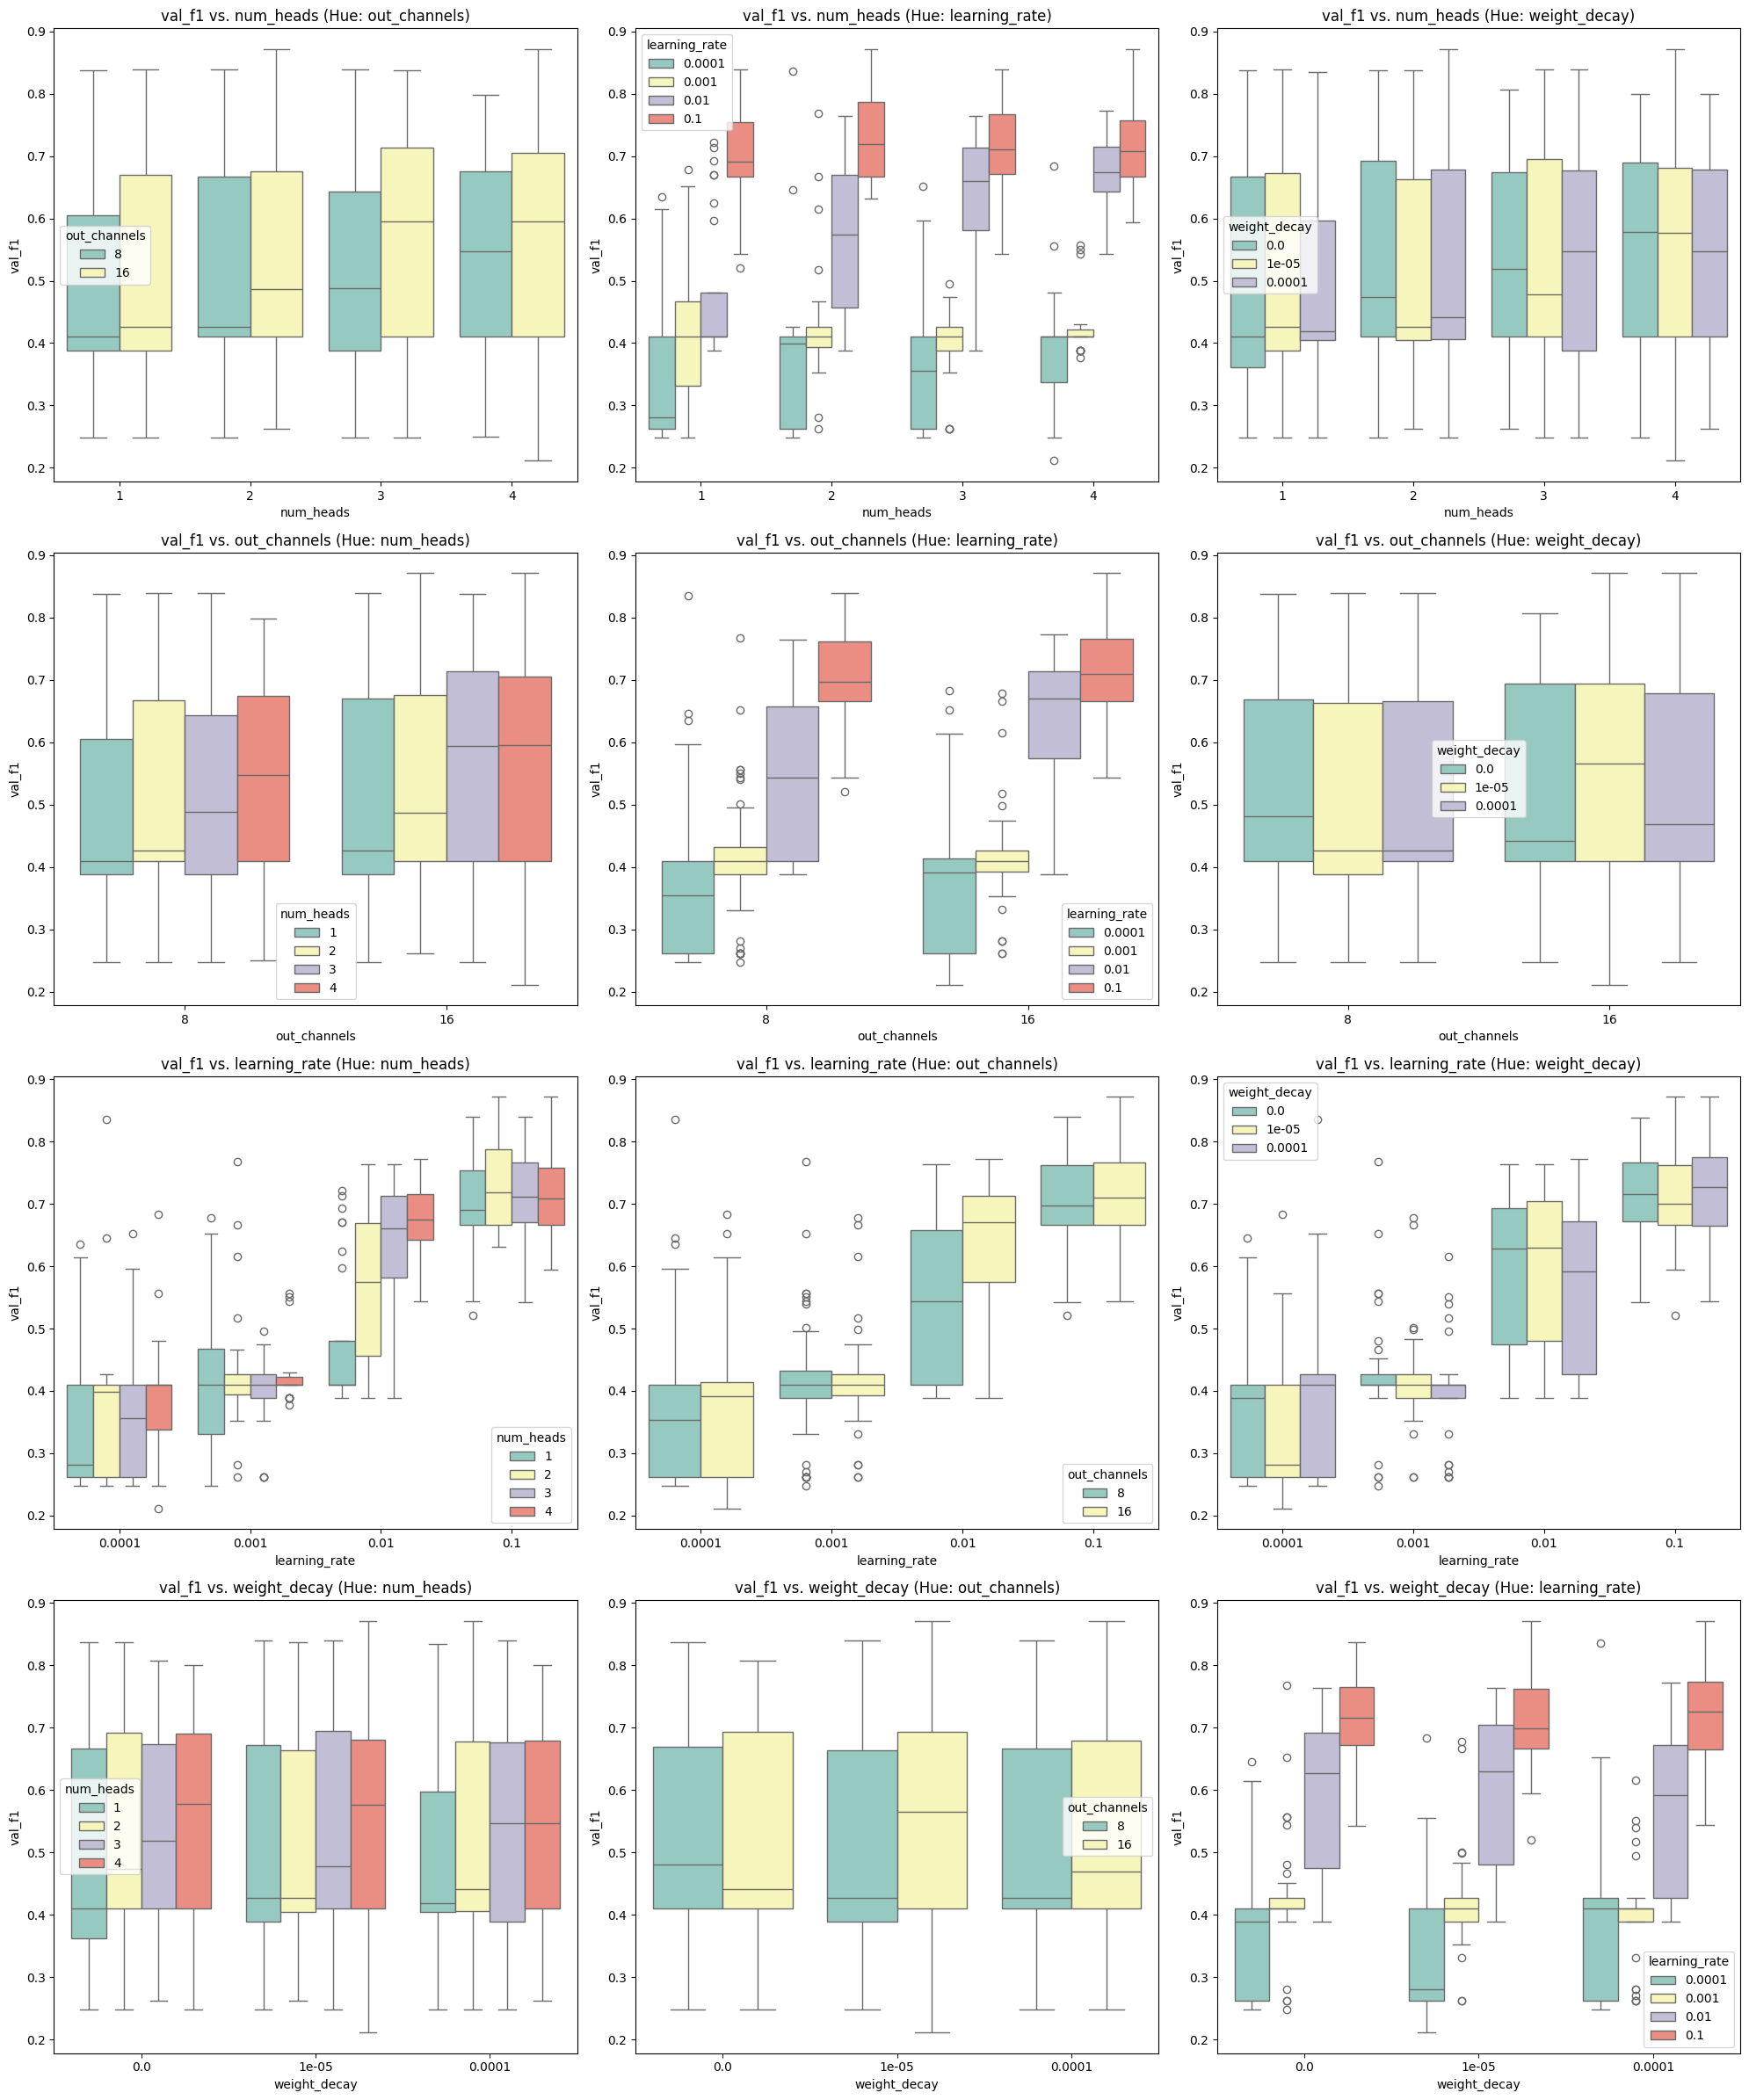

In [11]:
from performance_visualizations import plot_hyperparameter_boxplots
plot_hyperparameter_boxplots(
    results_df=results_df_1,
    hyperparameters=['num_heads', 'out_channels', 'learning_rate', 'weight_decay'],
    metric='val_f1',
    use_hue=True
)

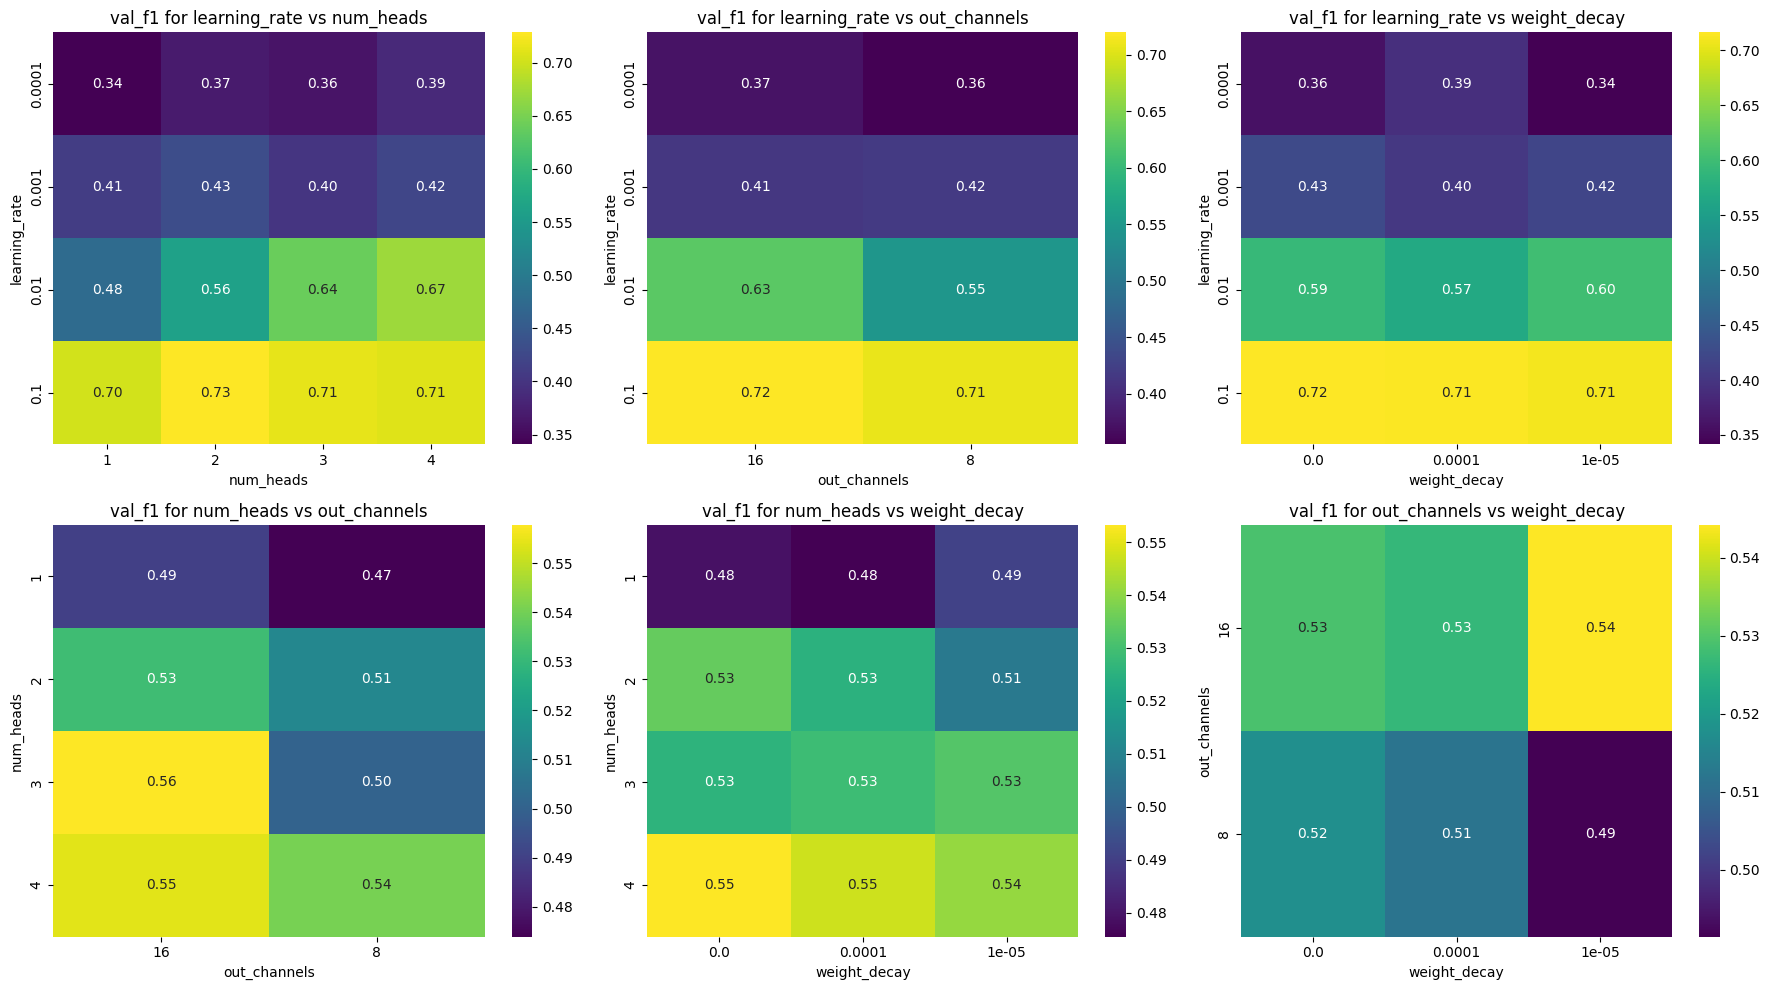

In [12]:
from performance_visualizations import plot_hyperparameter_heatmaps
plot_hyperparameter_heatmaps(
    results_df=results_df_1,
    hyperparameters=['learning_rate', 'num_heads', 'out_channels', 'weight_decay'],
    metric='val_f1'
)

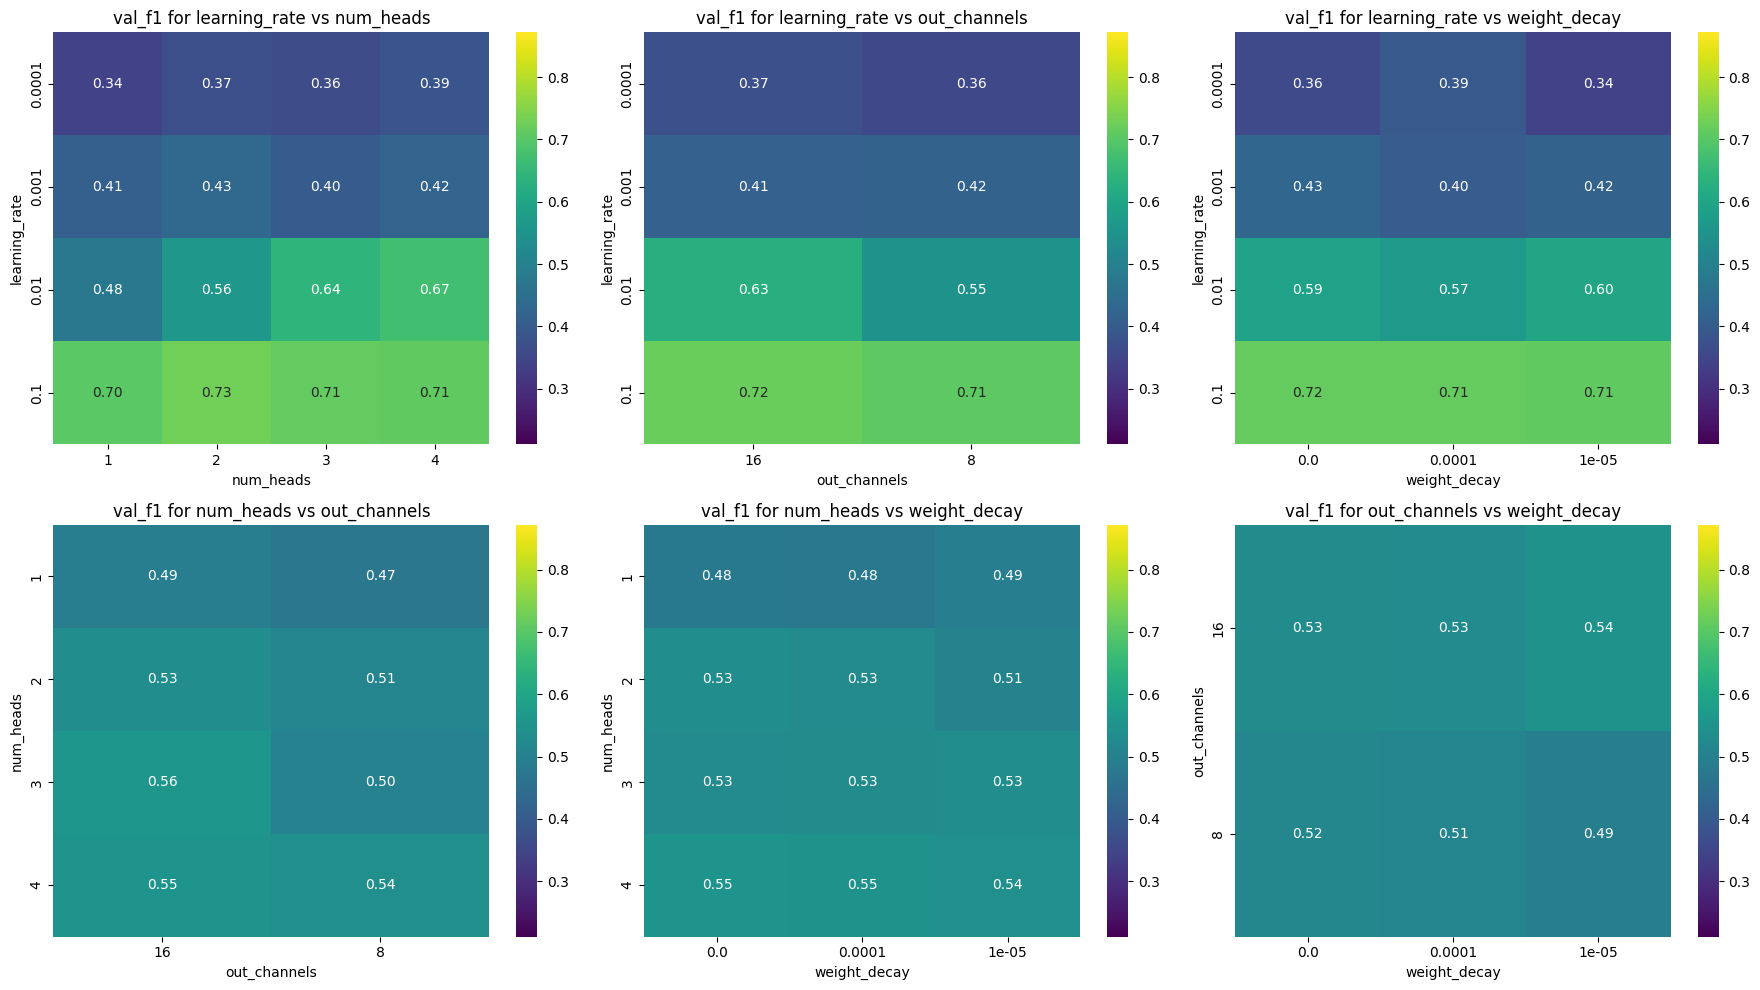

In [2]:
from performance_visualizations import plot_uniform_hyperparameter_heatmaps
plot_uniform_hyperparameter_heatmaps(
    results_df=results_df_1,
    hyperparameters=['learning_rate', 'num_heads', 'out_channels', 'weight_decay'],
    metric='val_f1'
)

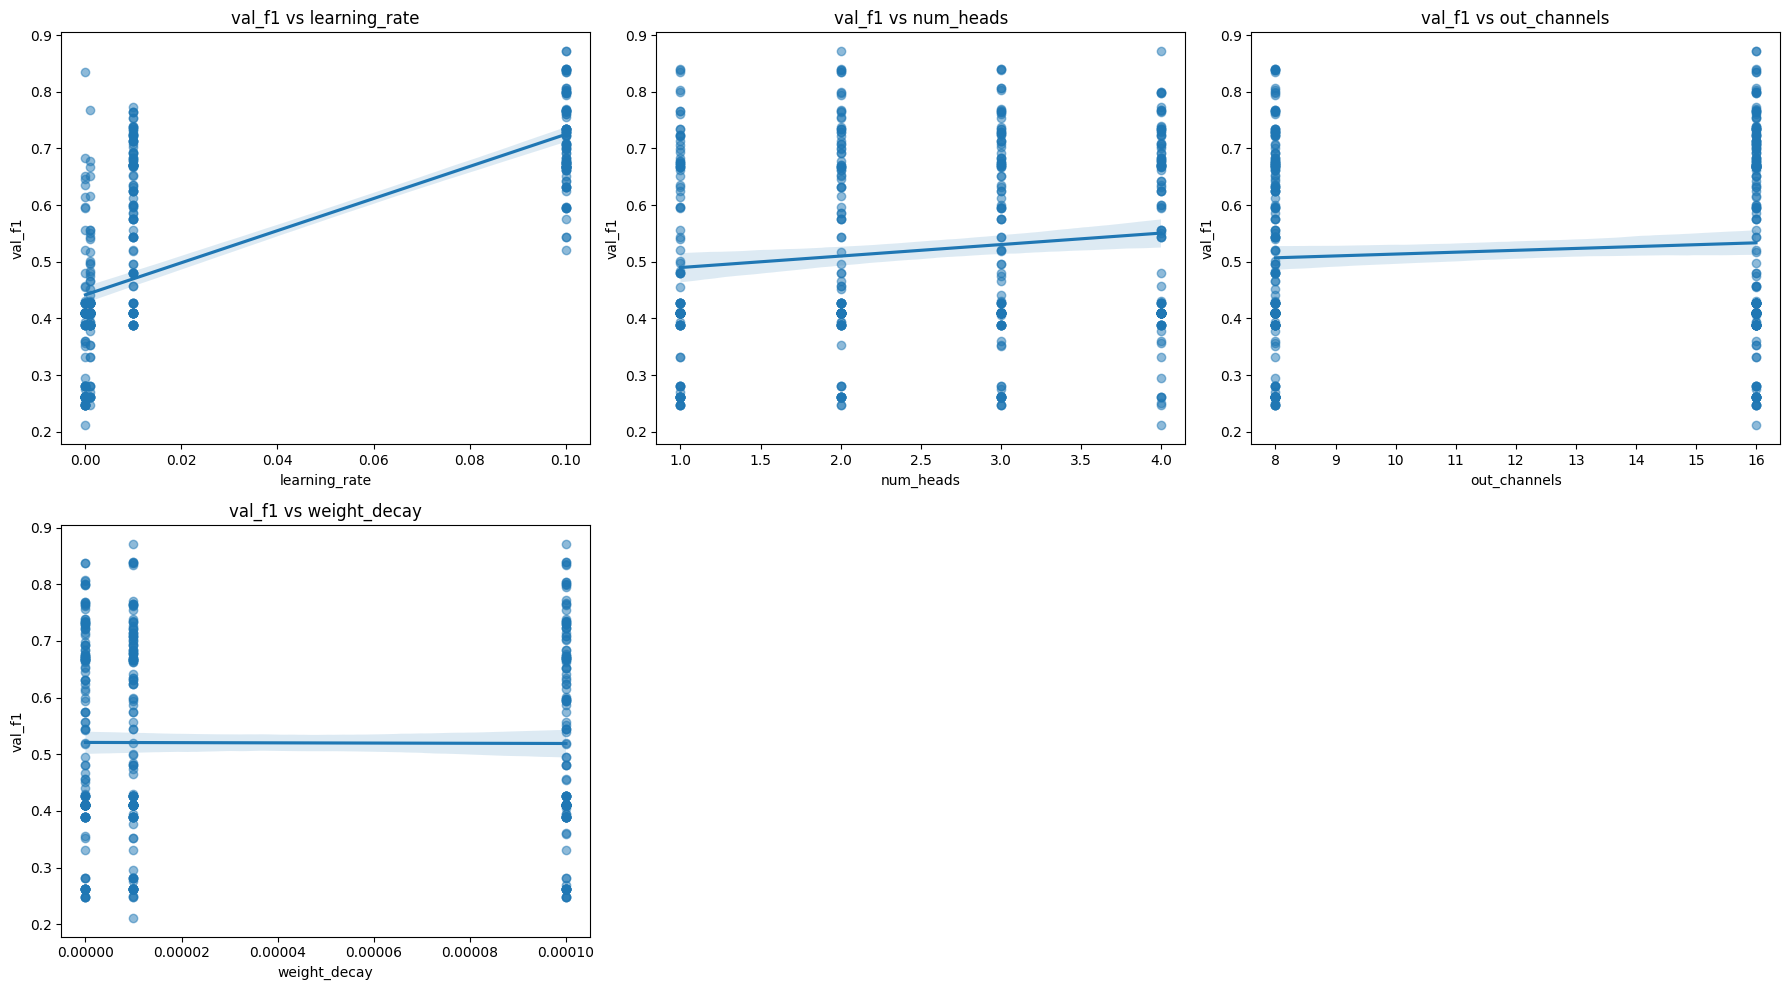

In [13]:
from performance_visualizations import plot_hyperparameter_scatterplots_with_regression
plot_hyperparameter_scatterplots_with_regression(
    results_df=results_df_1,
    hyperparameters=['learning_rate', 'num_heads', 'out_channels', 'weight_decay'],
    metric='val_f1'
)

In [3]:
# Second hyperparameter grid
param_grid = {
    'num_heads': [2,3],
    'out_channels': [16],
    'num_epochs': [10],
    'learning_rate': [1e-1, 1e-2],
    'weight_decay': [0, 1e-5]
}

In [ ]:
# Perform second grid search with K-fold cross-validation on the training set
best_params_2, best_val_f1_2, best_val_accuracy_2, results_df_2 = perform_grid_search(
    train_graphs=train_graphs,
    train_labels=train_labels,
    num_splits=5,
    param_grid=param_grid,
    batch_size=32,
    model_class=GAT,
    device=device
)